In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import pandas as pd
from pgmpy.models import BayesianModel

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.drop('slope', axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


In [6]:
#Belief Network with each node linked to all of its parents

feat_graph = {'age': [], 'sex': [], 'cp': [], 'trestbps': ['age', 'sex', 'chol', 'fbs'], 'chol': ['age', 'sex', 'fbs'], 'fbs': ['age', 'sex'], 'restecg': ['age', 'sex', 'chol', 'fbs'], 'thalach': ['age', 'sex'], 
              'exang': [], 
              'oldpeak': ['thalach'], 'ca': ['age', 'sex'], 'thal': [], 'target': ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']}

In [7]:
feat_graph

{'age': [],
 'sex': [],
 'cp': [],
 'trestbps': ['age', 'sex', 'chol', 'fbs'],
 'chol': ['age', 'sex', 'fbs'],
 'fbs': ['age', 'sex'],
 'restecg': ['age', 'sex', 'chol', 'fbs'],
 'thalach': ['age', 'sex'],
 'exang': [],
 'oldpeak': ['thalach'],
 'ca': ['age', 'sex'],
 'thal': [],
 'target': ['cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'ca',
  'thal']}

In [8]:
bn = nx.DiGraph()
bn.add_nodes_from(feat_graph.keys())

for k, v in feat_graph.items():
    bn.add_edges_from(([(t, k) for t in v]))

In [9]:
bn.edges()

OutEdgeView([('age', 'trestbps'), ('age', 'chol'), ('age', 'fbs'), ('age', 'restecg'), ('age', 'thalach'), ('age', 'ca'), ('sex', 'trestbps'), ('sex', 'chol'), ('sex', 'fbs'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'ca'), ('cp', 'target'), ('trestbps', 'target'), ('chol', 'trestbps'), ('chol', 'restecg'), ('chol', 'target'), ('fbs', 'trestbps'), ('fbs', 'chol'), ('fbs', 'restecg'), ('fbs', 'target'), ('restecg', 'target'), ('thalach', 'oldpeak'), ('thalach', 'target'), ('exang', 'target'), ('oldpeak', 'target'), ('ca', 'target'), ('thal', 'target')])

In [10]:
def display(graph):
    pos = nx.circular_layout(graph)
    plt.figure(3,figsize=(9,9)) 
    nx.draw(graph, pos, with_labels=True)
    plt.show()

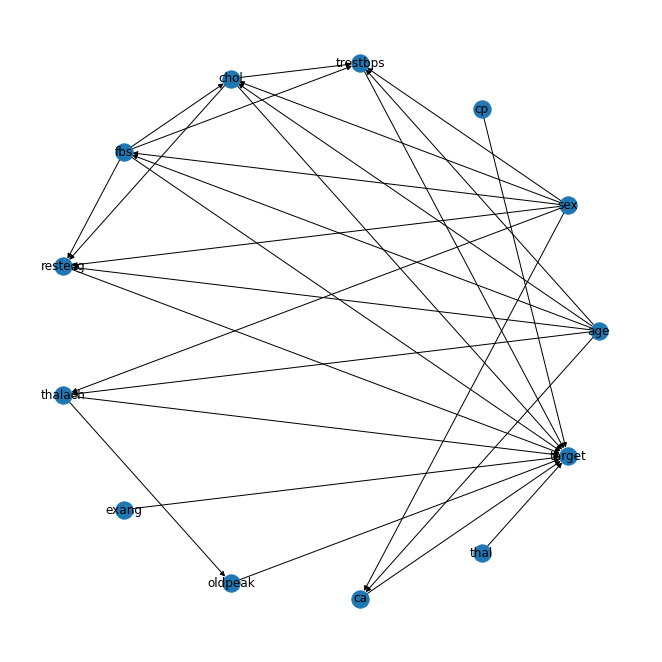

In [11]:
display(bn)

In [12]:
def moralize(bn):
    def get_parents(node):
        return [x[0] for x in bn.in_edges(node)]
    
    nodes = bn.nodes()
    mn = nx.Graph()
    mn.add_nodes_from(nodes)
    
    for node in nodes:
        parents = get_parents(node)
#         print(node, parents)
        
        for par in parents:
            mn.add_edge(node, par)
            
        for par_pair in itertools.combinations(parents, 2):
            if not mn.has_edge(par_pair[0], par_pair[1]):
                mn.add_edge(par_pair[0], par_pair[1])
        
    return mn

In [13]:
mn = moralize(bn)

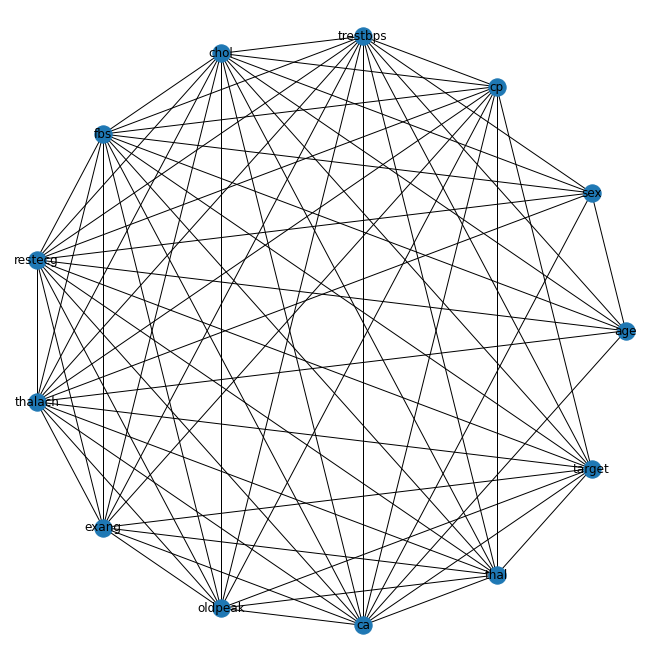

In [14]:
display(mn)

In [15]:
bn

In [16]:
bn.edges()

OutEdgeView([('age', 'trestbps'), ('age', 'chol'), ('age', 'fbs'), ('age', 'restecg'), ('age', 'thalach'), ('age', 'ca'), ('sex', 'trestbps'), ('sex', 'chol'), ('sex', 'fbs'), ('sex', 'restecg'), ('sex', 'thalach'), ('sex', 'ca'), ('cp', 'target'), ('trestbps', 'target'), ('chol', 'trestbps'), ('chol', 'restecg'), ('chol', 'target'), ('fbs', 'trestbps'), ('fbs', 'chol'), ('fbs', 'restecg'), ('fbs', 'target'), ('restecg', 'target'), ('thalach', 'oldpeak'), ('thalach', 'target'), ('exang', 'target'), ('oldpeak', 'target'), ('ca', 'target'), ('thal', 'target')])

In [17]:
bn_model = BayesianModel(bn.edges())

In [18]:
bn_model

In [19]:
dsample = data.sample(frac=0.1)

In [ ]:
bn_model.fit(dsample)

In [164]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [173]:
bn_model.nodes()

NodeView(('age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'ca', 'sex', 'cp', 'target', 'oldpeak', 'exang', 'thal'))

In [166]:
bn.nodes()

NodeView(('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target'))